In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym 
import sympy.plotting.plot as symplot 

In [15]:
#The 'peaks' function
def peaks(x,y):
    #expand to a 2D mesh
    x,y = np.meshgrid(x,y)

    z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
        - 10*(x/5 - x**3 -y**5) * np.exp(-x**2-y**2) \
        - 1/3*np.exp(-(x+1)**2 -y**2)
    return z

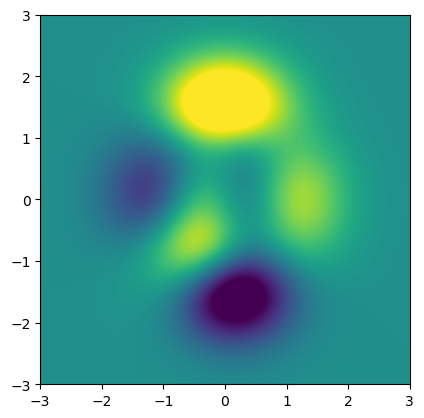

In [17]:
# Create the landscape
x = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)

Z = peaks(x,y)

#lets take a look :)
plt.imshow(Z, extent=[x[0],x[-1],y[0],y[-1]], vmin=-5, vmax=5, origin='lower')
plt.show()

In [22]:
# create derivative functions using sympy

sx,sy = sym.symbols('sx,sy')

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
      - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
      - 1/3*sym.exp(-(sx+1)**2 - sy**2)


# create functions from the sympy-computed derivatives
df_x = sym.lambdify( (sx,sy),sym.diff(sZ,sx),'sympy' )
df_y = sym.lambdify( (sx,sy),sym.diff(sZ,sy),'sympy' )

df_x(1,1).evalf()

-1.07369833656079

In [31]:
 #Random starting point (uniform between -2 and +2)
 localmin = np.random.rand(2)*4-2
 startpnt = localmin[:]

 #learning parameters
 learning_rate = .01
 training_epochs = 1000

 #run through training

 trajectory = np.zeros((training_epochs,2))
 for i in range(training_epochs):
    grad = np.array([
        df_x(localmin[0],localmin[1]).evalf(),
        df_y(localmin[0],localmin[1]).evalf()
    ])
    localmin = localmin - learning_rate*grad
    trajectory[i,:] = localmin

print(localmin)
print(startpnt)

[0.228278920556369 -1.62553495750000]
[ 0.60976553 -0.95020024]


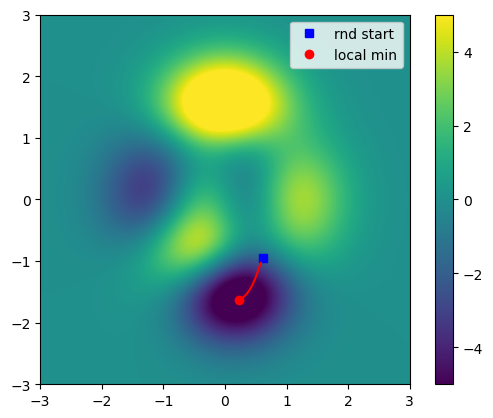

In [32]:
#plot
plt.imshow(Z, extent=[x[0],x[-1],y[0],y[-1]], vmin=-5, vmax=5, origin='lower')
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmin[0],localmin[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start', 'local min'])
plt.colorbar()
plt.show()